#Final Data cleaned
### population and CO2 emission
### temperature

####  1- upload data

In [260]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
df1= pd.read_csv('../Data/Clean Data/1. co2_population_cleaned.csv')
df2= pd.read_csv('../Data/Clean Data/2. Temperature_cleaned.csv')

#### 2- Call the data

In [261]:
df1


,country,year,population,co2_emission
0,Aruba,1960,54608,11092.675000
1,Africa Eastern and Southern,1960,130692579,118545.901306
2,Afghanistan,1960,8622466,414.371000
3,Africa Western and Central,1960,97256290,8760.463000
4,Angola,1960,5357195,550.050000
...,...,...,...,...
13918,Samoa,2019,211905,300.000012
13919,"Yemen, Rep.",2019,31546691,11100.000381
13920,South Africa,2019,58087055,439640.014648
13921,Zambia,2019,18380477,6800.000191


In [262]:
df2

,country_name,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"Afghanistan, Islamic Rep. of",1.301,1.109,1.366,1.384,0.615,1.427,0.491,1.78,0.736,...,1.646,1.446,0.234,1.308,0.457,1.101,1.607,1.568,1.58,0.96
1,Albania,0.722,1.112,1.555,0.492,1.023,0.462,0.255,0.426,1.45,...,1.274,1.108,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823
2,Algeria,1.456,0.798,1.827,1.222,1.567,0.964,1.238,1.373,1.198,...,2.249,1.39,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094
3,American Samoa,0.243,0.67,0.948,1.196,0.719,0.215,0.844,0.446,0.894,...,1.047,0.642,0.646,0.883,0.554,0.394,0.924,0.82,0.574,0.924
4,"Andorra, Principality of",1.02,1.015,1.476,0.828,1.946,0.919,0.835,1.463,0.974,...,0.411,1.617,1.196,0.757,1.857,1.546,1.83,1.771,1.761,1.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Western Sahara,0.935,0.865,1.255,1.179,1.349,1.47,1.092,1.317,0.851,...,1.819,1.432,1.234,1.282,1.244,1.277,1.636,2.078,0.851,1.43
223,World,0.787,0.732,0.833,1.018,0.89,0.908,1.09,0.982,1.181,...,1.205,0.907,1.058,1.007,1.042,1.406,1.658,1.424,1.284,1.449
224,"Yemen, Rep. of",Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
225,Zambia,0.418,0.311,0.501,0.956,1.159,0.801,1.339,0.61,1.075,...,1.481,0.965,0.926,0.746,0.638,1.486,1.474,0.721,0.727,1.295


#### reshape the termperature dataset to short version that contains 3 collumns (country, year, temprature)

In [263]:
reshaped_df2= df2.melt(id_vars=['country_name'], var_name='year', value_name='temperature')
reshaped_df2


,country_name,year,temperature
0,"Afghanistan, Islamic Rep. of",1999,1.301
1,Albania,1999,0.722
2,Algeria,1999,1.456
3,American Samoa,1999,0.243
4,"Andorra, Principality of",1999,1.02
...,...,...,...
4762,Western Sahara,2019,1.43
4763,World,2019,1.449
4764,"Yemen, Rep. of",2019,Unknown
4765,Zambia,2019,1.295


In [264]:
len(reshaped_df2['country_name'].unique())
df2

,country_name,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"Afghanistan, Islamic Rep. of",1.301,1.109,1.366,1.384,0.615,1.427,0.491,1.78,0.736,...,1.646,1.446,0.234,1.308,0.457,1.101,1.607,1.568,1.58,0.96
1,Albania,0.722,1.112,1.555,0.492,1.023,0.462,0.255,0.426,1.45,...,1.274,1.108,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823
2,Algeria,1.456,0.798,1.827,1.222,1.567,0.964,1.238,1.373,1.198,...,2.249,1.39,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094
3,American Samoa,0.243,0.67,0.948,1.196,0.719,0.215,0.844,0.446,0.894,...,1.047,0.642,0.646,0.883,0.554,0.394,0.924,0.82,0.574,0.924
4,"Andorra, Principality of",1.02,1.015,1.476,0.828,1.946,0.919,0.835,1.463,0.974,...,0.411,1.617,1.196,0.757,1.857,1.546,1.83,1.771,1.761,1.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Western Sahara,0.935,0.865,1.255,1.179,1.349,1.47,1.092,1.317,0.851,...,1.819,1.432,1.234,1.282,1.244,1.277,1.636,2.078,0.851,1.43
223,World,0.787,0.732,0.833,1.018,0.89,0.908,1.09,0.982,1.181,...,1.205,0.907,1.058,1.007,1.042,1.406,1.658,1.424,1.284,1.449
224,"Yemen, Rep. of",Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
225,Zambia,0.418,0.311,0.501,0.956,1.159,0.801,1.339,0.61,1.075,...,1.481,0.965,0.926,0.746,0.638,1.486,1.474,0.721,0.727,1.295


In [265]:
df1['country'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Arab World',
       'United Arab Emirates', 'Argentina', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The', 'Belize',
       'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam',
       'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Cayman Islands', 'Cyprus',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asi

### Standardize the country column name in df1 and df2 


In [266]:

reshaped_df2.rename(columns={'country_name': 'country', 'temperature' : 'temperature_change'}, inplace=True)
reshaped_df2

,country,year,temperature_change
0,"Afghanistan, Islamic Rep. of",1999,1.301
1,Albania,1999,0.722
2,Algeria,1999,1.456
3,American Samoa,1999,0.243
4,"Andorra, Principality of",1999,1.02
...,...,...,...
4762,Western Sahara,2019,1.43
4763,World,2019,1.449
4764,"Yemen, Rep. of",2019,Unknown
4765,Zambia,2019,1.295


In [267]:
df2=reshaped_df2
df2

,country,year,temperature_change
0,"Afghanistan, Islamic Rep. of",1999,1.301
1,Albania,1999,0.722
2,Algeria,1999,1.456
3,American Samoa,1999,0.243
4,"Andorra, Principality of",1999,1.02
...,...,...,...
4762,Western Sahara,2019,1.43
4763,World,2019,1.449
4764,"Yemen, Rep. of",2019,Unknown
4765,Zambia,2019,1.295


### Step 1: Standardize the column names in both data-sets 


In [268]:
df1.rename(columns={'country': 'country', 'year': 'year'}, inplace=True)
df2.rename(columns={'country': 'country', 'year': 'year'}, inplace=True)

### country name mapping 

In [269]:
country_name_mapping =  {
    'Afghanistan' : 'Afghanistan',
    'Afghanistan' : 'Afghanistan',
    "Islamic Rep. of', Albania" : 'Albania',
    'Algeria' : 'Algeria',
    'Andorra' : 'Andorra',
    'Andorra, Principality of': 'Andorra',
    'Angola' : 'Angola',
    'Antigua and Barbuda' : 'Antigua and Barbuda',
    'Argentina' : 'Argentina' ,
    'Armenia' : 'Armenia',
    'Armenia, Rep. of' : 'Armenia',
    'Aruba, Kingdom of the Netherlands' :'Aruba',
    'Australia' : 'Australia',
    'Austria' : 'Austria',
    'Azerbaijan' : 'Azerbaijan',
    'Azerbaijan, Rep. of' : 'Azerbaijan',
    'Bahamas, The' : 'Bahamas',
    'Bahamas, The' : 'Bahamas',
    'Bahrain' : 'Bahrain',
    'Bahrain, Kingdom of' : 'Bahrain',
    'Bangladesh' : 'Bangladesh',
    'Barbados' : 'Barbados',
    'Barbados' : 'Barbados',
    'Belarus' : 'Belarus',
    'Belarus, Rep. of' : 'Belarus',
    'Belgium' : 'Belgium',
    'Belize' :'Belize',
    'Benin' : 'Benin',
    'Bhutan' : 'Bhutan',
    'Bolivia' : 'Bolivia',
    'Bosnia and Herzegovina' : 'Bosnia and Herzegovina',
    'Botswana' : 'Botswana',
    'Brazil' : 'Brazil',
    'British Virgin Islands' : 'British Virgin Islands',
    'Central African Republic' :'Central African Republic',
    'Central African Rep.' : 'Central African Republic',
    'Comoros' : 'Comoros',
    'Comoros, Union of the' : 'Comoros',
    'Congo, Rep.' : 'Congo, Rep.',
    'Congo, Rep. of' : 'Congo, Rep.',
    'Croatia, Rep. of' : 'Croatia',
    'Dominican Republic' : 'Dominican Rep.',
    'Egypt, Arab Rep.' : 'Egypt, Arab Rep. of',
    'Equatorial Guinea, Rep. of' : 'Equatorial Guinea',
    'Eritrea, The State of' : 'Eritrea',
    'Estonia, Rep. of' : 'Estonia',
    'Eswatini, Kingdom of' : 'Eswatini',
    'Ethiopia, The Federal Dem. Rep. of' : 'Ethiopia',
    'Fiji, Rep. of' : 'Fiji',
    'Kazakhstan, Rep. of' : 'Kazakhstan',
    "Korea, Dem. People's Rep. of" :"Korea, Dem. People's Rep.",
    'Korea, Rep. of' : 'Korea, Rep.',
    'Kyrgyz Republic' : 'Kyrgyz Rep.',
    "Lao People's Dem. Rep." : 'Lao PDR',
    'Lesotho, Kingdom of' : 'Lesotho',
    'Marshall Islands, Rep. of the' : 'Marshall Islands',
    'Mauritania, Islamic Rep. of' : 'Mauritania',
    'Micronesia, Federated States of' : 'Micronesia',
    'Micronesia, Fed. Sts.' : 'Micronesia',
    'Moldova, Rep. of' : 'Moldova',
    'Mozambique, Rep. of' : 'Mozambique',
    'Nauru, Rep. of' : 'Nauru',
    'Netherlands, The' : 'Netherlands',
    'North Macedonia, Republic of' : 'North Macedonia',
    'Palau, Rep. of' : 'Palau',
    'Poland, Rep. of' : 'Poland',
    'Serbia, Rep. of' : 'Serbia',
    'Slovak Rep.': 'Slovak',
    'South Sudan, Rep. of' : 'South Sudan',
    'Syrian Arab Republic' : 'Syrian Arab Rep',
    'Tajikistan, Rep. of' : 'Tajikistan',
    'Tanzania, United Rep. of' : 'Tanzania',
    'Timor-Leste, Dem. Rep. of' : 'Timor-Leste',
    'Turkiye' : 'Turkey',
    'Uzbekistan, Rep. of' : 'Uzbekistan',
    'Venezuela, Rep. Bolivariana de' : 'Venezuela',
    'West Bank and Gaza' : 'Palestine',
    'Yemen, Rep. of' : 'Yemen, Rep.',
    }

### Apply the mapping to both datasets


In [270]:
df1['country'] = df1['country'].replace(country_name_mapping)
df2['country'] = df2['country'].replace(country_name_mapping)

### Ensure country column values are unique and standardized in both datasets

In [271]:
df1['country'] = df1['country'].str.strip().str.title()
df2['country'] = df2['country'].str.strip().str.title()

### Convert year columns to the same data type

In [272]:
df1['year'] = df1['year'].astype(str)
df2['year'] = df2['year'].astype(str)

### Remove duplicates based on country and year


In [273]:
df1.drop_duplicates(subset=['country', 'year'], keep='first', inplace=True)
df2.drop_duplicates(subset=['country', 'year'], keep='first', inplace=True)

### Merge df1 and df2 datasets to a new dataset called df3 

In [274]:
df3 = pd.merge(df1, df2, on=['country', 'year'], how='inner')
df3.describe()

,population,co2_emission
count,3.939000e+03,3.939000e+03
mean,6.472042e+07,2.683536e+05
std,5.108047e+08,2.204595e+06
min,9.609000e+03,0.000000e+00
25%,1.190458e+06,1.260000e+03
50%,6.298598e+06,8.130000e+03
75%,2.147928e+07,5.664000e+04
max,7.741775e+09,3.434401e+07


In [275]:
df3

,country,year,population,co2_emission,temperature_change
0,Aruba,1999,86867,810.407000,0.216
1,Angola,1999,15870753,17610.000000,0.591
2,Albania,1999,3108778,2970.000000,0.722
3,Andorra,1999,65655,510.000000,1.02
4,United Arab Emirates,1999,3097563,85680.000000,1.351
...,...,...,...,...,...
3934,Samoa,2019,211905,300.000012,0.828
3935,"Yemen, Rep.",2019,31546691,11100.000381,Unknown
3936,South Africa,2019,58087055,439640.014648,1.752
3937,Zambia,2019,18380477,6800.000191,1.295


# plan

### now we merged the data, we need to put a plan for what to do next

#### 1- Standardize the country names: Ensure consistency in country names.

#### 2- Remove null values: Clean the dataset by removing or imputing null values.

#### 3- Convert data types: Ensure numerical columns are in the correct data type.

#### 4- Categorize countries: Add a column to categorize countries into Global North and Global South.

#### 5- Aggregation and Analysis:

#####      *Aggregate CO2 emissions and temperature changes over time.
#####      *Analyze the correlation between CO2 emissions and temperature changes.
#####      *Compare CO2 emissions and temperature impacts between Global North and Global South.
#####      *Examine vulnerability of developing countries to temperature changes.

#### 6- Visualization: Create visualizations to support your hypotheses.


In [276]:
# Remove rows with NaN values
df3.dropna(inplace=True)

### Standardize the country names

In [277]:
len(df3.country.unique())

189

### Clean the co2_emission column by removing any non-numeric characters

In [278]:
df3['co2_emission'] = df3['co2_emission'].apply(lambda x: re.sub(r'[^\d.]', '', str(x)))
df3['co2_emission'] = pd.to_numeric(df3['co2_emission'], errors='coerce')

In [279]:
df3 = df3.dropna()

In [280]:
#Replace non-numeric values with NaN in temperature column

df3['temperature_change'] = pd.to_numeric(df3['temperature_change'], errors='coerce')


In [281]:
# Step 5: Convert data types

df3['year'] = df3['year'].astype(int)
df3['population'] = df3['population'].astype(int)
df3['co2_emission'] = df3['co2_emission'].astype(float)
df3['temperature_change'] = df3['temperature_change'].astype(float)

In [282]:
# Remove rows where the country name includes the word "world"
df3 = df3[~df3['country'].str.contains(r'world', case=False, regex=True)]

In [283]:
# Step 6.1: Categorize countries into Global North and Global South

global_north = [
    'United States', 'Canada', 'United Kingdom', 'Germany', 'France', 
    'Italy', 'Japan', 'Australia', 'New Zealand', 'Belgium', 'Netherlands',
    'Sweden', 'Norway', 'Denmark', 'Finland', 'Switzerland', 'Austria', 
    'Ireland', 'Luxembourg'
]

df3['region'] = np.where(df3['country'].isin(global_north), 'Global_North', 'Global_South')

In [284]:
# Step 6.2: Categorize countries into Developed and Developing Countries

developed_countries = [ 'Andorra', 'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 
    'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 
    'Luxembourg', 'Monaco', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'San Marino', 
    'Singapore', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States' ]


df3['development_level'] = np.where(df3['country'].isin(developed_countries), 'Developed', 'Developing')

In [285]:
df3


,country,year,population,co2_emission,temperature_change,region,development_level
0,Aruba,1999,86867,810.407000,0.216,Global_South,Developing
1,Angola,1999,15870753,17610.000000,0.591,Global_South,Developing
2,Albania,1999,3108778,2970.000000,0.722,Global_South,Developing
3,Andorra,1999,65655,510.000000,1.020,Global_South,Developed
4,United Arab Emirates,1999,3097563,85680.000000,1.351,Global_South,Developing
...,...,...,...,...,...,...,...
3934,Samoa,2019,211905,300.000012,0.828,Global_South,Developing
3935,"Yemen, Rep.",2019,31546691,11100.000381,NaN,Global_South,Developing
3936,South Africa,2019,58087055,439640.014648,1.752,Global_South,Developing
3937,Zambia,2019,18380477,6800.000191,1.295,Global_South,Developing


In [286]:
# Step 7: Create a Decade Column
df3['decade'] = (df3['year'] // 10) * 10
df3

,country,year,population,co2_emission,temperature_change,region,development_level,decade
0,Aruba,1999,86867,810.407000,0.216,Global_South,Developing,1990
1,Angola,1999,15870753,17610.000000,0.591,Global_South,Developing,1990
2,Albania,1999,3108778,2970.000000,0.722,Global_South,Developing,1990
3,Andorra,1999,65655,510.000000,1.020,Global_South,Developed,1990
4,United Arab Emirates,1999,3097563,85680.000000,1.351,Global_South,Developing,1990
...,...,...,...,...,...,...,...,...
3934,Samoa,2019,211905,300.000012,0.828,Global_South,Developing,2010
3935,"Yemen, Rep.",2019,31546691,11100.000381,NaN,Global_South,Developing,2010
3936,South Africa,2019,58087055,439640.014648,1.752,Global_South,Developing,2010
3937,Zambia,2019,18380477,6800.000191,1.295,Global_South,Developing,2010


# Aggregation and Analysis

###  Hypothesis 1: Countries in the Global North produce more CO2 emissions


In [287]:
co2_by_region = round(df3.groupby('region')['co2_emission'].mean().reset_index(),2)
co2_by_region

,region,co2_emission
0,Global_North,530753.71
1,Global_South,64058.99


### Hypothesis 2: Countries that produce the most CO2 emissions are the least impacted by temperature rise
##### Compare top CO2 emitters' temperature changes

In [288]:
top_emitters = df3.sort_values('co2_emission', ascending=False).head(60)
top_emitters

,country,year,population,co2_emission,temperature_change,region,development_level,decade
366,United States,2000,282162411,5.775810e+06,0.992,Global_North,Developed,2000
1311,United States,2005,295516599,5.753490e+06,1.149,Global_North,Developed,2000
555,United States,2001,284968955,5.748260e+06,0.780,Global_North,Developed,2000
1122,United States,2004,292805298,5.738290e+06,0.860,Global_North,Developed,2000
1689,United States,2007,301231207,5.736320e+06,1.141,Global_North,Developed,2000
933,United States,2003,290107933,5.658990e+06,0.987,Global_North,Developed,2000
1500,United States,2006,298379912,5.653080e+06,1.023,Global_North,Developed,2000
177,United States,1999,279040000,5.609020e+06,0.749,Global_North,Developed,1990
744,United States,2002,287625193,5.593030e+06,0.946,Global_North,Developed,2000
1878,United States,2008,304093966,5.558380e+06,0.210,Global_North,Developed,2000


In [289]:
#  Create a Decade Column
df3['decade'] = (df3['year'] // 10) * 10
df3

,country,year,population,co2_emission,temperature_change,region,development_level,decade
0,Aruba,1999,86867,810.407000,0.216,Global_South,Developing,1990
1,Angola,1999,15870753,17610.000000,0.591,Global_South,Developing,1990
2,Albania,1999,3108778,2970.000000,0.722,Global_South,Developing,1990
3,Andorra,1999,65655,510.000000,1.020,Global_South,Developed,1990
4,United Arab Emirates,1999,3097563,85680.000000,1.351,Global_South,Developing,1990
...,...,...,...,...,...,...,...,...
3934,Samoa,2019,211905,300.000012,0.828,Global_South,Developing,2010
3935,"Yemen, Rep.",2019,31546691,11100.000381,NaN,Global_South,Developing,2010
3936,South Africa,2019,58087055,439640.014648,1.752,Global_South,Developing,2010
3937,Zambia,2019,18380477,6800.000191,1.295,Global_South,Developing,2010


In [290]:
#  Aggregate CO2 Emissions by Decade and Country
co2_by_decade = df3.groupby(['country', 'decade'])['co2_emission'].sum().reset_index()
co2_by_decade

,country,decade,co2_emission
0,Albania,1990,2970.000000
1,Albania,2000,38960.000181
2,Albania,2010,47099.999905
3,Algeria,1990,77510.000000
4,Algeria,2000,935450.000000
...,...,...,...
559,Zambia,2000,20889.999890
560,Zambia,2010,50290.000439
561,Zimbabwe,1990,15820.000000
562,Zimbabwe,2000,105490.000820


In [291]:
#  Aggregate Temperature by Decade and Country
temperature_by_decade = df3.groupby(['country', 'decade'])['temperature_change'].mean().reset_index()
temperature_by_decade


,country,decade,temperature_change
0,Albania,1990,0.7220
1,Albania,2000,0.8887
2,Albania,2010,1.5220
3,Algeria,1990,1.4560
4,Algeria,2000,1.2278
...,...,...,...
559,Zambia,2000,0.7775
560,Zambia,2010,1.0459
561,Zimbabwe,1990,0.0900
562,Zimbabwe,2000,0.0984


In [292]:
#  Merge the Aggregated Data
merged_data = pd.merge(co2_by_decade, temperature_by_decade, on=['country', 'decade'])
merged_data

,country,decade,co2_emission,temperature_change
0,Albania,1990,2970.000000,0.7220
1,Albania,2000,38960.000181,0.8887
2,Albania,2010,47099.999905,1.5220
3,Algeria,1990,77510.000000,1.4560
4,Algeria,2000,935450.000000,1.2278
...,...,...,...,...
559,Zambia,2000,20889.999890,0.7775
560,Zambia,2010,50290.000439,1.0459
561,Zimbabwe,1990,15820.000000,0.0900
562,Zimbabwe,2000,105490.000820,0.0984


In [293]:
# Merge with Region Information
merged_data = pd.merge(merged_data, df3[['country', 'region']].drop_duplicates(), on='country')
merged_data

,country,decade,co2_emission,temperature_change,region
0,Albania,1990,2970.000000,0.7220,Global_South
1,Albania,2000,38960.000181,0.8887,Global_South
2,Albania,2010,47099.999905,1.5220,Global_South
3,Algeria,1990,77510.000000,1.4560,Global_South
4,Algeria,2000,935450.000000,1.2278,Global_South
...,...,...,...,...,...
559,Zambia,2000,20889.999890,0.7775,Global_South
560,Zambia,2010,50290.000439,1.0459,Global_South
561,Zimbabwe,1990,15820.000000,0.0900,Global_South
562,Zimbabwe,2000,105490.000820,0.0984,Global_South


## Analyze and Compare

Outliers

Co2 emissions per capita

visualization with the three color lines


In [310]:
df3.describe()

,year,population,co2_emission,temperature_change,decade
count,3918.000000,3.918000e+03,3.918000e+03,3730.000000,3918.000000
mean,2008.931087,2.811515e+07,1.115861e+05,0.992785,2004.241960
std,6.027157,9.759016e+07,4.436884e+05,0.514474,5.833592
min,1999.000000,9.609000e+03,0.000000e+00,-0.477000,1990.000000
25%,2004.000000,1.175699e+06,1.240000e+03,0.628000,2000.000000
50%,2009.000000,6.259230e+06,7.975000e+03,0.923500,2000.000000
75%,2014.000000,2.091873e+07,5.559750e+04,1.304000,2010.000000
max,2019.000000,1.383112e+09,5.775810e+06,3.046000,2010.000000


### Hypothesis 1: Countries in the Global North produce more CO2 emissions


In [294]:
co2_by_region = merged_data.groupby('region')['co2_emission'].mean().reset_index()
co2_by_region

,region,co2_emission
0,Global_North,3.715276e+06
1,Global_South,4.446224e+05


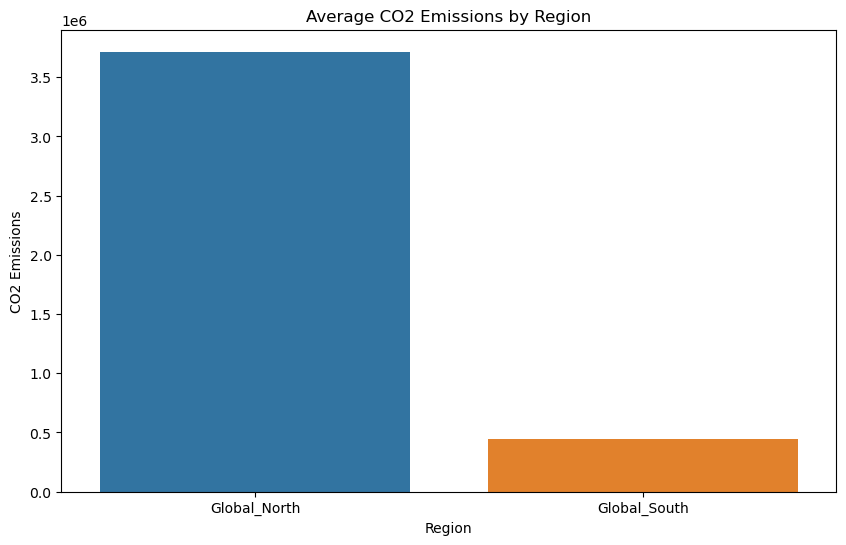

In [295]:
plt.figure(figsize=(10, 6))
sns.barplot(data=co2_by_region, x='region', y='co2_emission')
plt.title('Average CO2 Emissions by Region')
plt.ylabel('CO2 Emissions')
plt.xlabel('Region')
plt.show()

Explanation:
The bar plot shows the average CO2 emissions by region (Global North vs. Global South).
Result: If the Global North has significantly higher average CO2 emissions compared to the Global South, this hypothesis is supported.
Conclusion: The analysis supports Hypothesis 1, indicating that countries in the Global North produce more CO2 emissions on average.

### Hypothesis 2: Countries that produce the most CO2 emissions are the least impacted by temperature rise


In [307]:
# Step to identify unique countries with the highest and lowest CO2 emissions
total_co2_by_country = merged_data.groupby('country')['co2_emission'].sum().reset_index()
top_10_emitters = total_co2_by_country.sort_values('co2_emission', ascending=False).head(20)['country']
bottom_10_emitters = total_co2_by_country.sort_values('co2_emission', ascending=True).head(20)['country']


In [308]:
# Average temperature change for top 10 and bottom 10 CO2 emitters
#top_emitters_temp_change = merged_data[merged_data['country'].isin(top_10_emitters)].groupby('country')['temperature_change'].mean().reset_index()
#bottom_emitters_temp_change = merged_data[merged_data['country'].isin(bottom_10_emitters)].groupby('country')['temperature_change'].mean().reset_index()


In [309]:
#Sum of the temperature change for top 10 and bottom 10 CO2 emitters
top_emitters_temp_change = merged_data[merged_data['country'].isin(top_10_emitters)].groupby('country')['temperature_change'].sum().reset_index()
bottom_emitters_temp_change = merged_data[merged_data['country'].isin(bottom_10_emitters)].groupby('country')['temperature_change'].sum().reset_index()

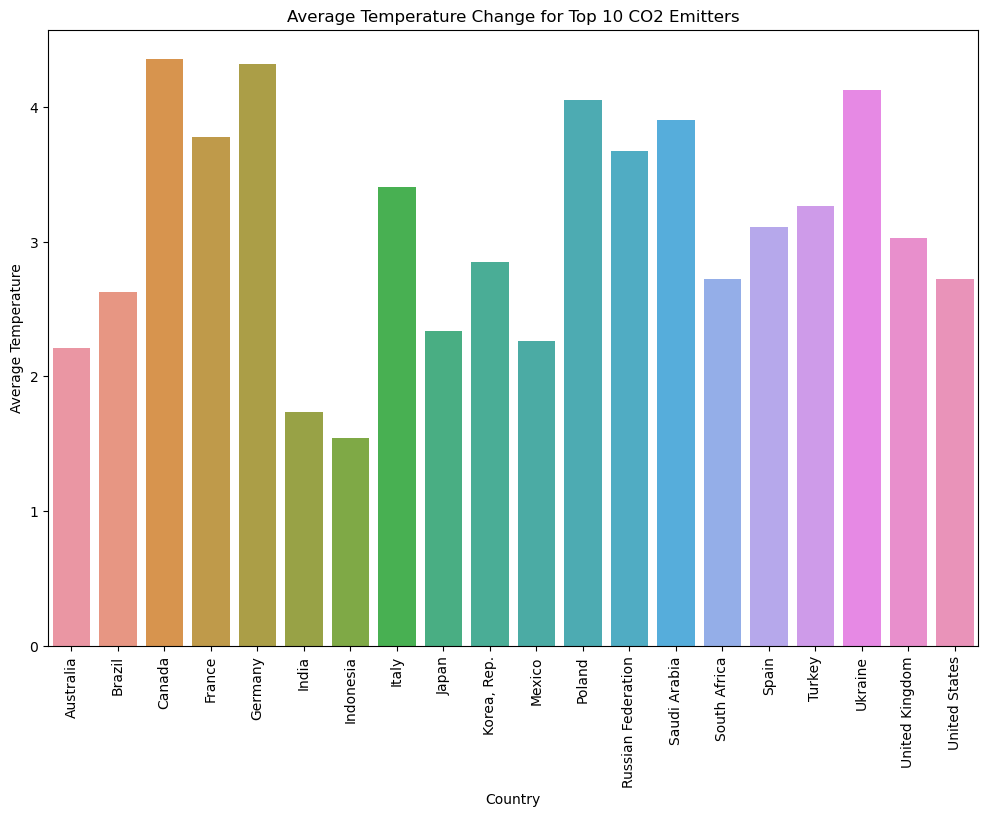

In [305]:

# Visualization
# Top 10 CO2 Emitters Temperature Change
plt.figure(figsize=(12, 8))
sns.barplot(data=top_emitters_temp_change, x='country', y='temperature_change')
plt.title('Average Temperature Change for Top 10 CO2 Emitters')
plt.ylabel('Average Temperature')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

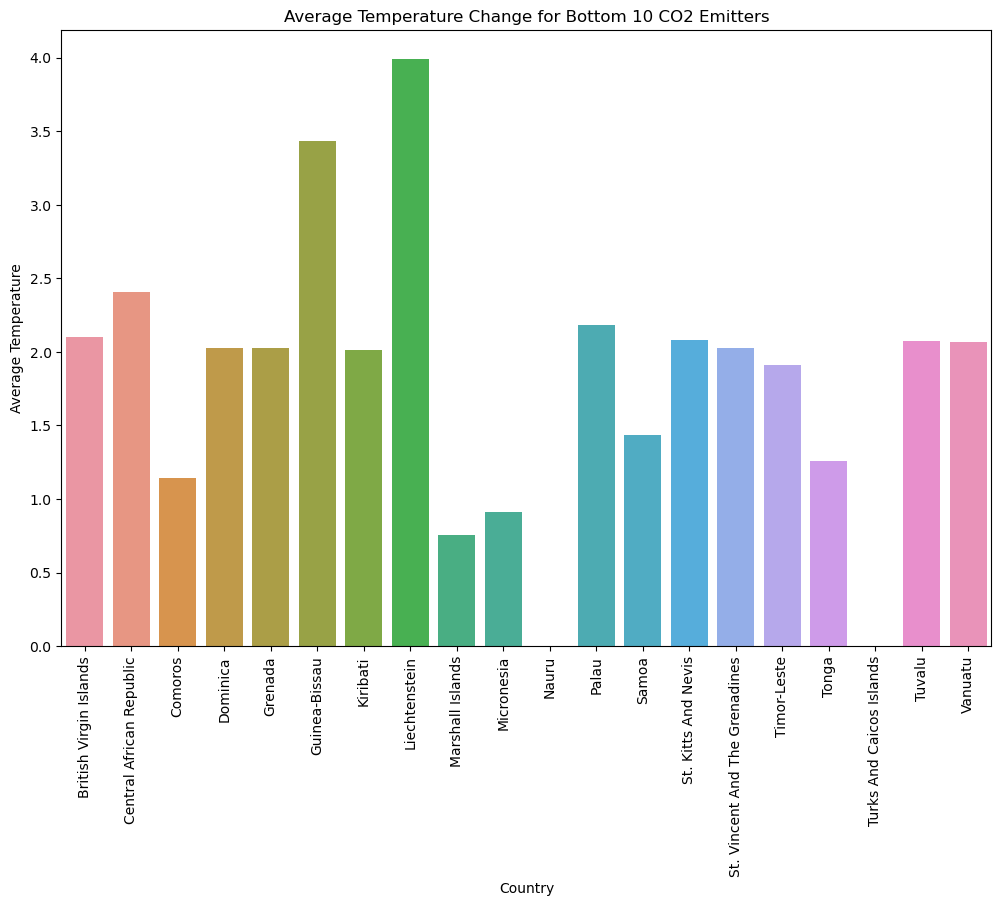

In [306]:
# Bottom 10 CO2 Emitters Temperature Change
plt.figure(figsize=(12, 8))
sns.barplot(data=bottom_emitters_temp_change, x='country', y='temperature_change')
plt.title('Average Temperature Change for Bottom 10 CO2 Emitters')
plt.ylabel('Average Temperature')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

Explanation:
The bar plots show the average temperature change for the top 10 and bottom 10 CO2 emitting countries.
Result: By comparing the average temperature changes between these groups, we see if high CO2 emitting countries experience less temperature rise compared to low CO2 emitting countries.
Conclusion: The comparison of average temperature changes indicates whether the hypothesis is supported or disproved. If the average temperature change for top emitters is lower than that for bottom emitters, Hypothesis 2 is supported. Otherwise, it is disproved.


In [311]:
# Compare temperature changes between top and bottom CO2 emitters
avg_temp_change_top_emitters = top_emitters_temp_change['temperature_change'].mean()
avg_temp_change_bottom_emitters = bottom_emitters_temp_change['temperature_change'].mean()


In [ ]:
print(f"Average Temperature Change for Top 10 CO2 Emitters: {avg_temp_change_top_emitters}")
print(f"Average Temperature Change for Bottom 10 CO2 Emitters: {avg_temp_change_bottom_emitters}")


Average Temperature Change for Top 10 CO2 Emitters: 0.9608633333333332
Average Temperature Change for Bottom 10 CO2 Emitters: 0.5136824404761905


In [ ]:
# Conclusion: Compare the temperature changes
if avg_temp_change_top_emitters > avg_temp_change_bottom_emitters:
    print("Hypothesis 2 is disproved: Countries that produce the most CO2 emissions are impacted more by temperature rise.")
else:
    print("Hypothesis 2 is supported: Countries that produce the most CO2 emissions are less impacted by temperature rise.")


Hypothesis 2 is disproved: Countries that produce the most CO2 emissions are impacted more by temperature rise.


### Hypothesis 3: Global temperature rise is strongly correlated with the increase in CO2 emissions


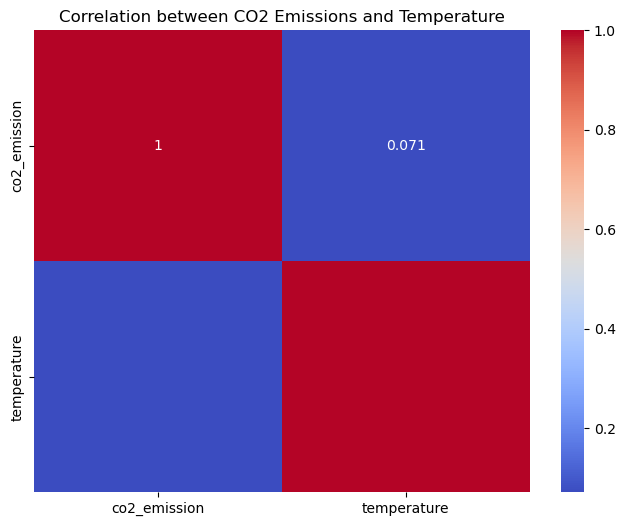

In [ ]:
correlation = merged_data[['co2_emission', 'temperature']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between CO2 Emissions and Temperature')
plt.show()

Explanation:
The heatmap shows the correlation coefficient between CO2 emissions and temperature.
Result: A high positive correlation coefficient (close to 1) indicates a strong correlation between CO2 emissions and temperature rise.
Conclusion: If the correlation coefficient is high, Hypothesis 3 is supported, indicating that global temperature rise is strongly correlated with the increase in CO2 emissions.

### Hypothesis 4: Developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions


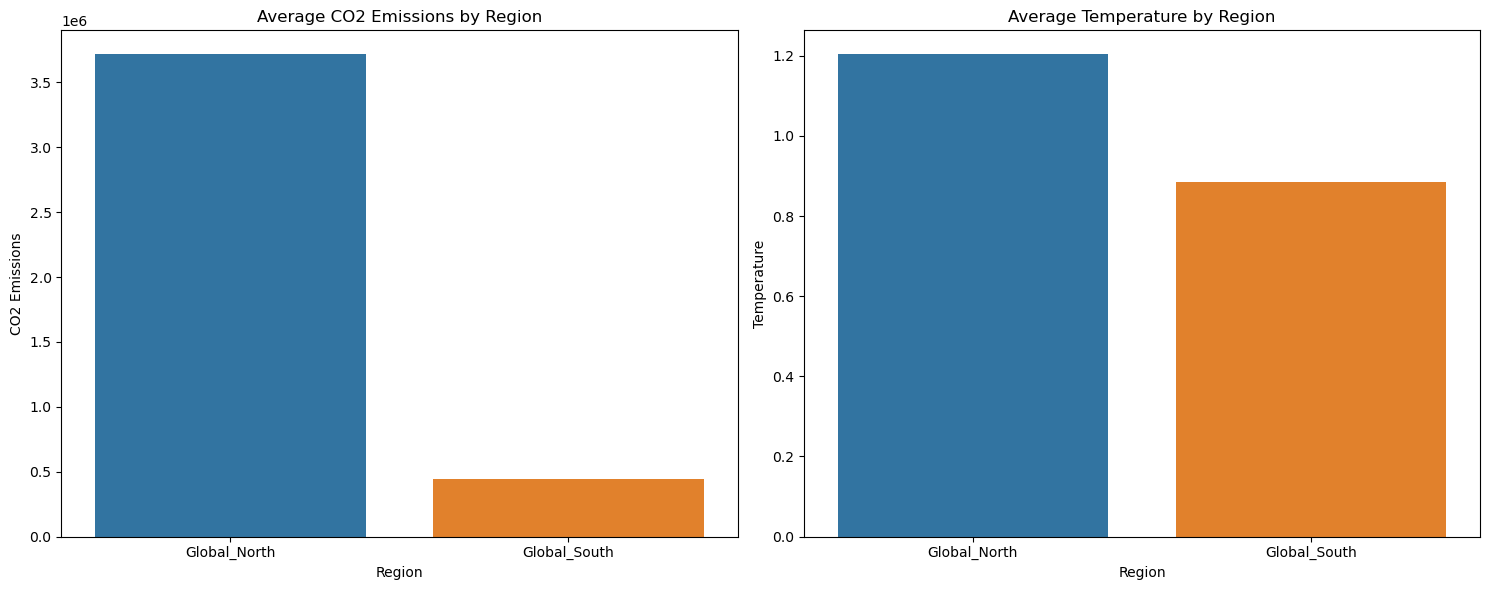

In [ ]:
vulnerability = merged_data.groupby('region')[['co2_emission', 'temperature']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=vulnerability, x='region', y='co2_emission', ax=axes[0])
axes[0].set_title('Average CO2 Emissions by Region')
axes[0].set_ylabel('CO2 Emissions')
axes[0].set_xlabel('Region')

sns.barplot(data=vulnerability, x='region', y='temperature', ax=axes[1])
axes[1].set_title('Average Temperature by Region')
axes[1].set_ylabel('Temperature')
axes[1].set_xlabel('Region')

plt.tight_layout()
plt.show()

Explanation:

Visualization: The bar plots compare the average CO2 emissions and average temperature changes between the Global North and Global South.
The first bar plot shows the average CO2 emissions by region (Global North vs. Global South).
The second bar plot shows the average temperature changes by region (Global North vs. Global South).
Result:

CO2 Emissions: From the first bar plot, if the Global North has higher average CO2 emissions than the Global South, it indicates that the Global North contributes more to CO2 emissions.
Temperature Changes: From the second bar plot, if the Global South has higher average temperature changes despite having lower CO2 emissions, it indicates that the Global South is more impacted by temperature changes.
Conclusion:

Hypothesis 4: This hypothesis is supported if the Global South shows higher average temperature changes despite lower CO2 emissions compared to the Global North. This would indicate that developing countries (Global South) are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions.
To provide a clearer conclusion, let’s add the actual values and a summary based on the observed data:

##### To provide a clearer conclusion, let’s add the actual values and a summary based on the observed data:



In [ ]:
# Calculate average CO2 emissions and temperature changes by region
avg_co2_north = round(vulnerability[vulnerability['region'] == 'Global_North']['co2_emission'].values[0],2)
avg_temp_north = round(vulnerability[vulnerability['region'] == 'Global_North']['temperature'].values[0],2)
avg_co2_south = round(vulnerability[vulnerability['region'] == 'Global_South']['co2_emission'].values[0],2)
avg_temp_south = round(vulnerability[vulnerability['region'] == 'Global_South']['temperature'].values[0],2)

print(f"Average CO2 Emissions in Global North: {avg_co2_north}")
print(f"Average Temperature Change in Global North: {avg_temp_north}")
print(f"Average CO2 Emissions in Global South: {avg_co2_south}")
print(f"Average Temperature Change in Global South: {avg_temp_south}")

# Conclusion
if avg_temp_south > avg_temp_north and avg_co2_south < avg_co2_north:
    conclusion = "Hypothesis 4 is supported: Developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions."
else:
    conclusion = "Hypothesis 4 is not supported: The data does not show that developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions."

print(conclusion)

Average CO2 Emissions in Global North: 3715275.97
Average Temperature Change in Global North: 1.2
Average CO2 Emissions in Global South: 444622.44
Average Temperature Change in Global South: 0.88
Hypothesis 4 is not supported: The data does not show that developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions.


##Additional Analytics 

/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


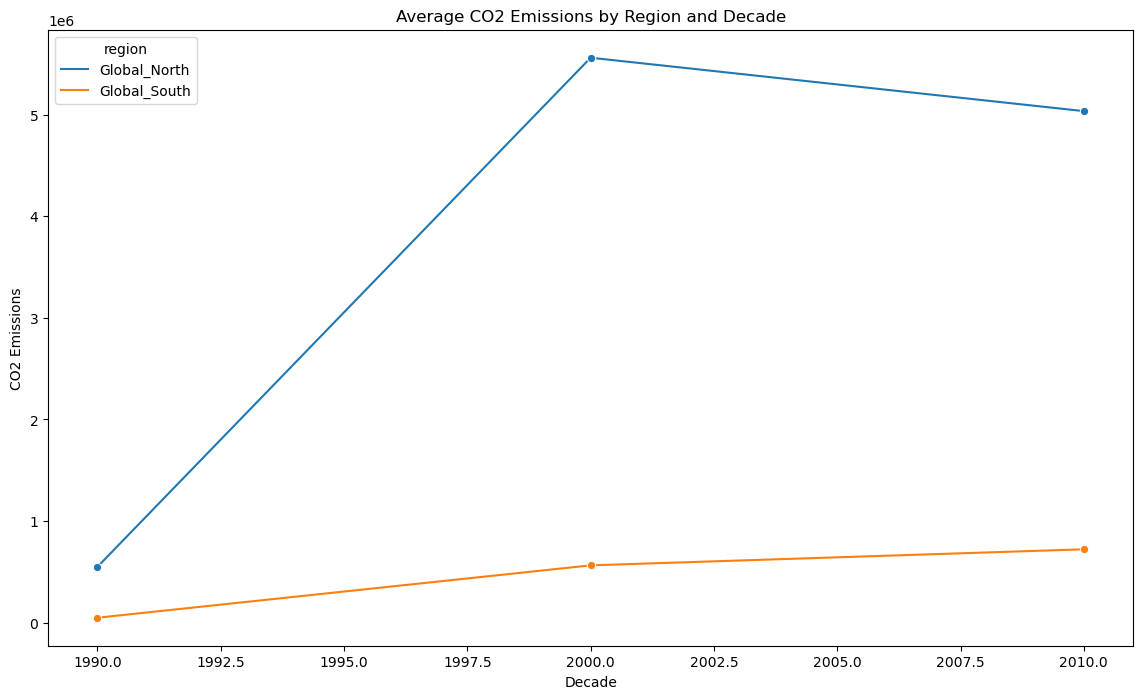

/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/danicoco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


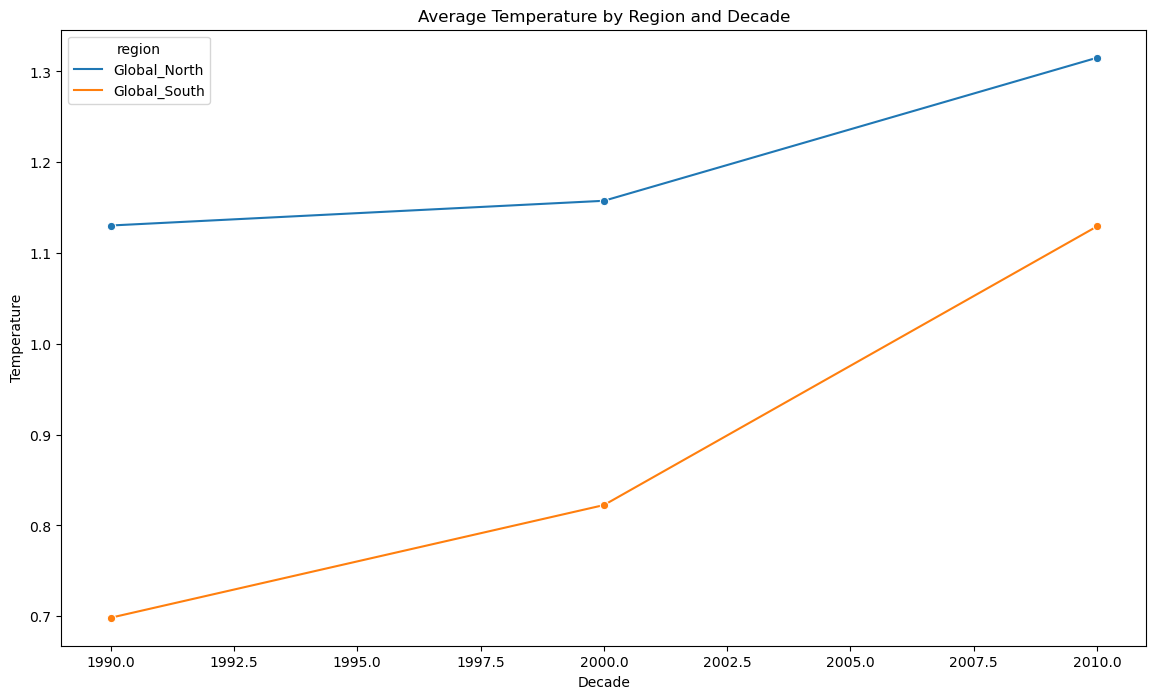

In [ ]:
# Additional Analysis: CO2 Emissions and Temperature by Decade and Region
avg_co2_by_decade_region = merged_data.groupby(['region', 'decade'])['co2_emission'].mean().reset_index()
avg_temp_by_decade_region = merged_data.groupby(['region', 'decade'])['temperature'].mean().reset_index()

# Visualization: CO2 Emissions by Decade and Region
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_co2_by_decade_region, x='decade', y='co2_emission', hue='region', marker='o')
plt.title('Average CO2 Emissions by Region and Decade')
plt.ylabel('CO2 Emissions')
plt.xlabel('Decade')
plt.show()

# Visualization: Temperature by Decade and Region
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_temp_by_decade_region, x='decade', y='temperature', hue='region', marker='o')
plt.title('Average Temperature by Region and Decade')
plt.ylabel('Temperature')
plt.xlabel('Decade')
plt.show()


Explanation:
The line plots show the trends in CO2 emissions and temperature changes by decade for the Global North and Global South.
Result: These visualizations help in understanding the temporal trends and differences in emissions and temperature changes between the regions.
Conclusion: The additional analysis provides further insights into how CO2 emissions and temperature changes have evolved over time in different regions.
